### Import des librairies

In [4]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

### Import et transformation du dataset pour l'exploitation

In [ ]:
df = pd.read_csv('..\data\provisoire.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace = True, axis = 1)
df

,titre,duree,budget,recette,casting_score,realisateur_score,compagny_score,suite,Action,Adventure,...,Music,Romance,Science Fiction,TV Movie,Thriller,War,Western,year,month,day
0,Dumb and Dumber To,110,40000000,169837010,79.0,27.0,135.0,3,0,0,...,0,0,0,0,0,0,0,2014,11,12
1,Captain America: The Winter Soldier,136,170000000,714766572,459.0,128.0,81.0,2,1,1,...,0,0,1,0,0,0,0,2014,3,20
2,Тот ещё Карлосон!,80,4000000,9938268,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,2012,3,15
3,See No Evil,84,8000000,18707966,5.0,0.0,0.0,1,0,0,...,0,0,0,0,1,0,0,2006,5,19
4,Brother Bear,85,128000000,250397798,24.0,0.0,0.0,1,0,1,...,0,0,0,0,0,0,0,2003,10,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669,Teenage Mutant Ninja Turtles,101,125000000,477200000,58.0,9.0,4.0,1,1,1,...,0,0,1,0,0,0,0,2014,8,7
3670,Fall,107,3000000,11900000,1.0,0.0,21.0,1,0,0,...,0,0,0,0,1,0,0,2022,8,11
3671,Mat Kilau,118,1814059,5283447,0.0,0.0,0.0,1,1,0,...,0,0,0,0,0,1,0,2022,6,23
3672,Ambasamuthiram Ambani,150,400000,2000000,0.0,0.0,1.0,1,0,0,...,0,1,0,0,0,0,0,2010,7,2


: 

In [5]:
df['casting_score'] = df['casting_score'].map(int)
df['realisateur_score'] = df['realisateur_score'].map(int)
df['compagny_score'] = df['compagny_score'].map(int)
df.dtypes

titre                object
duree                 int64
budget                int64
recette               int64
casting_score         int64
realisateur_score     int64
compagny_score        int64
suite                 int64
Action                int64
Adventure             int64
Animation             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
History               int64
Horror                int64
Music                 int64
Romance               int64
Science Fiction       int64
TV Movie              int64
Thriller              int64
War                   int64
Western               int64
year                  int64
month                 int64
day                   int64
dtype: object

In [6]:
df.describe()

,duree,budget,recette,casting_score,realisateur_score,compagny_score,suite,Action,Adventure,Animation,...,Music,Romance,Science Fiction,TV Movie,Thriller,War,Western,year,month,day
count,3671.000000,3.671000e+03,3.671000e+03,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,...,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000
mean,112.339689,3.498827e+07,1.012132e+08,50.591664,6.151457,29.311904,1.290929,0.285208,0.183601,0.065650,...,0.031599,0.176246,0.098066,0.000545,0.259057,0.039499,0.010079,2010.891038,6.782076,15.388995
std,21.848796,4.569206e+07,1.990530e+08,77.785741,12.619066,41.051287,1.251842,0.451575,0.387211,0.247702,...,0.174954,0.381081,0.297444,0.023338,0.438177,0.194805,0.099901,6.024664,3.445238,8.611166
min,63.000000,3.000000e+05,3.000000e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,1.000000,1.000000
25%,97.000000,5.786550e+06,6.103089e+06,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,4.000000,8.000000
50%,108.000000,1.800000e+07,2.901082e+07,28.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,7.000000,15.000000
75%,124.000000,4.200000e+07,1.012624e+08,75.000000,7.000000,39.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2016.000000,10.000000,23.000000
max,339.000000,3.800000e+08,2.920357e+09,2002.000000,128.000000,228.000000,34.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,12.000000,31.000000


In [7]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

In [8]:
corr = df.corr()
print(corr)

                      duree    budget   recette  casting_score  \
duree              1.000000  0.160713  0.175094       0.102315   
budget             0.160713  1.000000  0.747089       0.582994   
recette            0.175094  0.747089  1.000000       0.610354   
casting_score      0.102315  0.582994  0.610354       1.000000   
realisateur_score  0.164103  0.554479  0.557756       0.510662   
compagny_score    -0.031277  0.440130  0.365040       0.316508   
suite              0.021321  0.235153  0.268835       0.114957   
Action             0.168694  0.309795  0.203803       0.132574   
Adventure          0.005251  0.459005  0.367286       0.231957   
Animation         -0.247400  0.157482  0.136415       0.052896   
Comedy            -0.228986 -0.076697 -0.051699       0.024658   
Crime              0.050039 -0.034249 -0.052216       0.027167   
Documentary       -0.040192 -0.055707 -0.029475      -0.040995   
Drama              0.260090 -0.226626 -0.188508      -0.093666   
Family    

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_10508\92767312.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_10508\3532090939.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


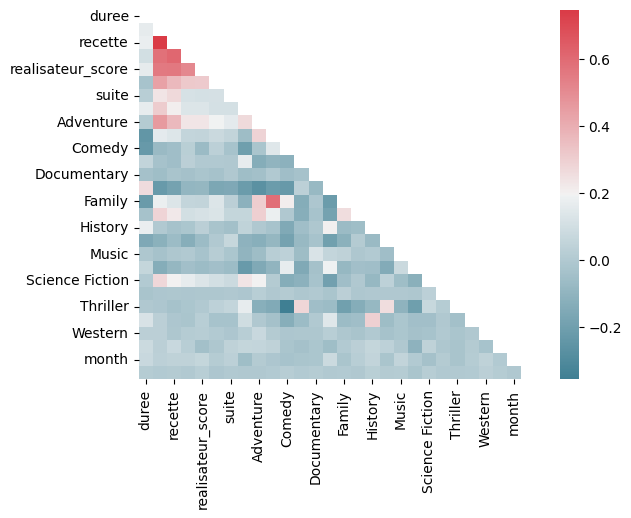

In [9]:
plot_corr(corr)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop(['recette', 'titre'], axis = 1)
Y = df['recette']

In [12]:
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA().fit(X_scaled)

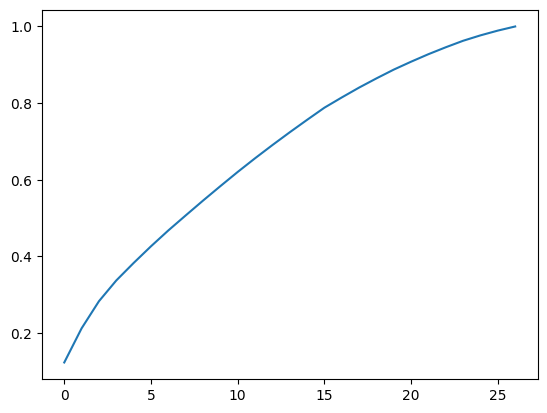

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [16]:
X_proj = pca.transform(X_scaled)
print(X_proj)

[[ 1.52883908 -0.33803265  0.4448755  ...  0.31349023 -0.51199501
   0.63037323]
 [ 8.59404933  4.04416062  2.26058613 ... -0.43737857  0.21251837
   2.16971443]
 [ 0.3316071  -3.4581797  -0.81568363 ... -1.84632354  0.26254382
   0.38316902]
 ...
 [-0.93078021  1.81994306  1.72369564 ... -0.50697327 -0.67495071
   0.45443304]
 [-1.51267685 -0.96959092  1.09936982 ...  0.23778701 -0.26622765
   0.13564545]
 [-1.16558615 -1.61576899 -0.69360076 ...  0.15791846 -0.54708614
  -0.22463722]]


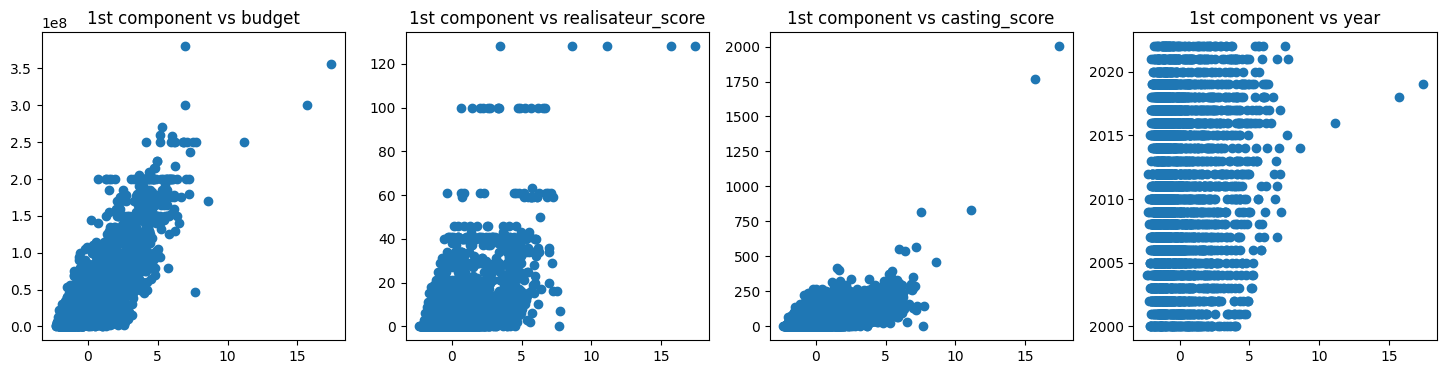

In [20]:
_, axes = plt.subplots(ncols=4, figsize=(18,4))
for i, (ax, col) in enumerate(zip(axes, ['budget', 'realisateur_score', 'casting_score', 'year'])):
    ax.scatter(X_proj[:,0], df[col])
    ax.set_title(f'1st component vs {col}')

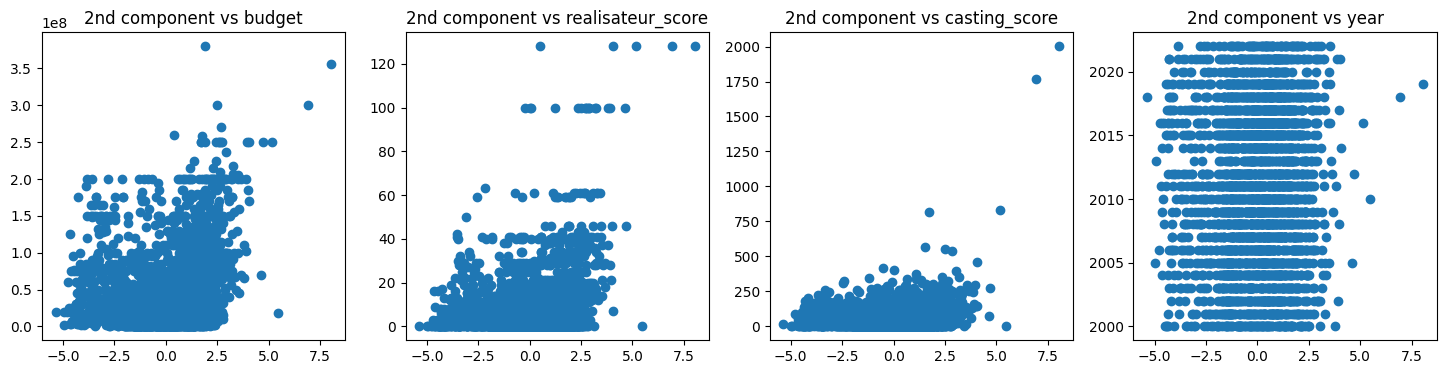

In [21]:
_, axes = plt.subplots(ncols=4, figsize=(18,4))
for i, (ax, col) in enumerate(zip(axes, ['budget', 'realisateur_score', 'casting_score', 'year'])):
    ax.scatter(X_proj[:,1], df[col])
    ax.set_title(f'2nd component vs {col}')